<a href="https://colab.research.google.com/github/AdsonRamos/if697-2020.2/blob/main/Projeto_IF697.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import math

from matplotlib import pyplot as plt

# Carregando dados

In [96]:
#Carregando os datasets
customers = pd.read_csv("https://raw.githubusercontent.com/AdsonRamos/if697-2020.2/main/datasets/olist_customers_dataset.csv", encoding="ISO-8859-1")
geolocation = pd.read_csv("https://raw.githubusercontent.com/AdsonRamos/if697-2020.2/main/datasets/olist_geolocation_dataset.csv", encoding="ISO-8859-1")
order_items = pd.read_csv("https://raw.githubusercontent.com/AdsonRamos/if697-2020.2/main/datasets/olist_order_items_dataset.csv", encoding="ISO-8859-1")
order_payments = pd.read_csv("https://raw.githubusercontent.com/AdsonRamos/if697-2020.2/main/datasets/olist_order_payments_dataset.csv", encoding="ISO-8859-1")
order_reviews = pd.read_csv("https://raw.githubusercontent.com/AdsonRamos/if697-2020.2/main/datasets/olist_order_reviews_dataset.csv", encoding="ISO-8859-1")
orders = pd.read_csv("https://raw.githubusercontent.com/AdsonRamos/if697-2020.2/main/datasets/olist_orders_dataset.csv", encoding="ISO-8859-1")
products = pd.read_csv("https://raw.githubusercontent.com/AdsonRamos/if697-2020.2/main/datasets/olist_products_dataset.csv", encoding="ISO-8859-1")
sellers = pd.read_csv("https://raw.githubusercontent.com/AdsonRamos/if697-2020.2/main/datasets/olist_sellers_dataset.csv", encoding="ISO-8859-1")

In [97]:
#verificando valores nulos no dataset customers
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [98]:
#verificando valores nulos no dataset geolocation
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [99]:
#verificando valores nulos no dataset order_items
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [100]:
#verificando valores nulos no dataset order_payments
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [101]:
#verificando valores nulos no dataset order_reviews
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [102]:
#verificando valores nulos no dataset orders
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [103]:
#verificando valores nulos no dataset products
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [104]:
#verificando valores nulos no dataset sellers
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

#Estudo sobre o dataset de clientes

In [105]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [106]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [107]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


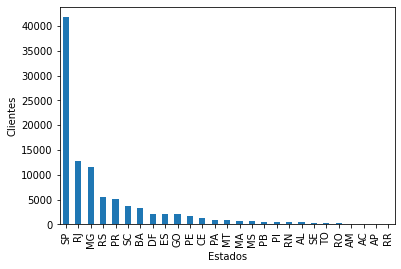

In [108]:
#Estados mais frequentes nos clients
customers['customer_state'].value_counts().plot(kind='bar', ylabel='Clientes', xlabel='Estados')

**Agrupamento por estados**

In [109]:
sudeste = ['MG', 'RJ', 'RS', 'SP']
nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PI', 'PE', 'RN', 'SE']
sul = ['PR', 'RS', 'SC']
norte = ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'MS', 'GO', 'DF']

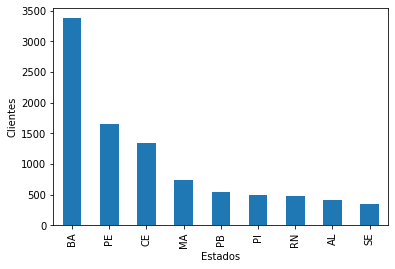

In [110]:
customers[customers.customer_state.isin(nordeste)]['customer_state'].value_counts().plot(kind='bar', ylabel='Clientes', xlabel='Estados')

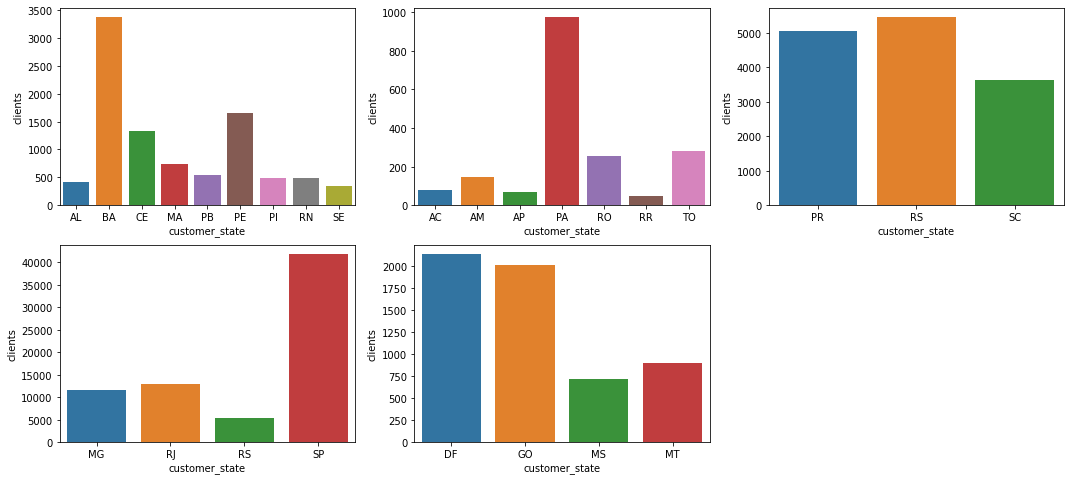

In [111]:
#Clientes distribuídos por regiões do país

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(18, 8))
fig.delaxes(axes[1,2])

northest_client_counts = customers[customers.customer_state.isin(nordeste)]['customer_state'].value_counts().rename_axis('customer_state').reset_index(name='clients')
northest_client_counts["customer_state"] = northest_client_counts["customer_state"].astype('category')

north_client_counts = customers[customers.customer_state.isin(norte)]['customer_state'].value_counts().rename_axis('customer_state').reset_index(name='clients')
north_client_counts["customer_state"] = north_client_counts["customer_state"].astype('category')

south_client_counts = customers[customers.customer_state.isin(sul)]['customer_state'].value_counts().rename_axis('customer_state').reset_index(name='clients')
south_client_counts["customer_state"] = south_client_counts["customer_state"].astype('category')

southest_client_counts = customers[customers.customer_state.isin(sudeste)]['customer_state'].value_counts().rename_axis('customer_state').reset_index(name='clients')
southest_client_counts["customer_state"] = southest_client_counts["customer_state"].astype('category')

midwest_client_counts = customers[customers.customer_state.isin(centro_oeste)]['customer_state'].value_counts().rename_axis('customer_state').reset_index(name='clients')
midwest_client_counts["customer_state"] = midwest_client_counts["customer_state"].astype('category')

#seaborn
sns.barplot(x='customer_state', y='clients', data=northest_client_counts, ax=axes[0][0])
sns.barplot(x='customer_state', y='clients', data=north_client_counts, ax=axes[0][1])
sns.barplot(x='customer_state', y='clients', data=south_client_counts, ax=axes[0][2])
sns.barplot(x='customer_state', y='clients', data=southest_client_counts, ax=axes[1][0])
sns.barplot(x='customer_state', y='clients', data=midwest_client_counts, ax=axes[1][1])

# Estudo sobre as localizações

In [112]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


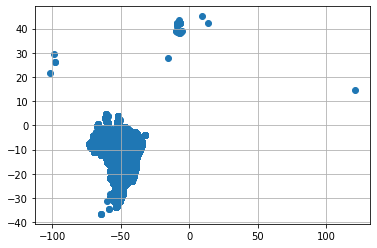

In [113]:
# Localização dos pedidos em relação ao mundo

fig, ax = plt.subplots()
ax.scatter(geolocation['geolocation_lng'], geolocation['geolocation_lat'])
ax.grid(True)

plt.show()

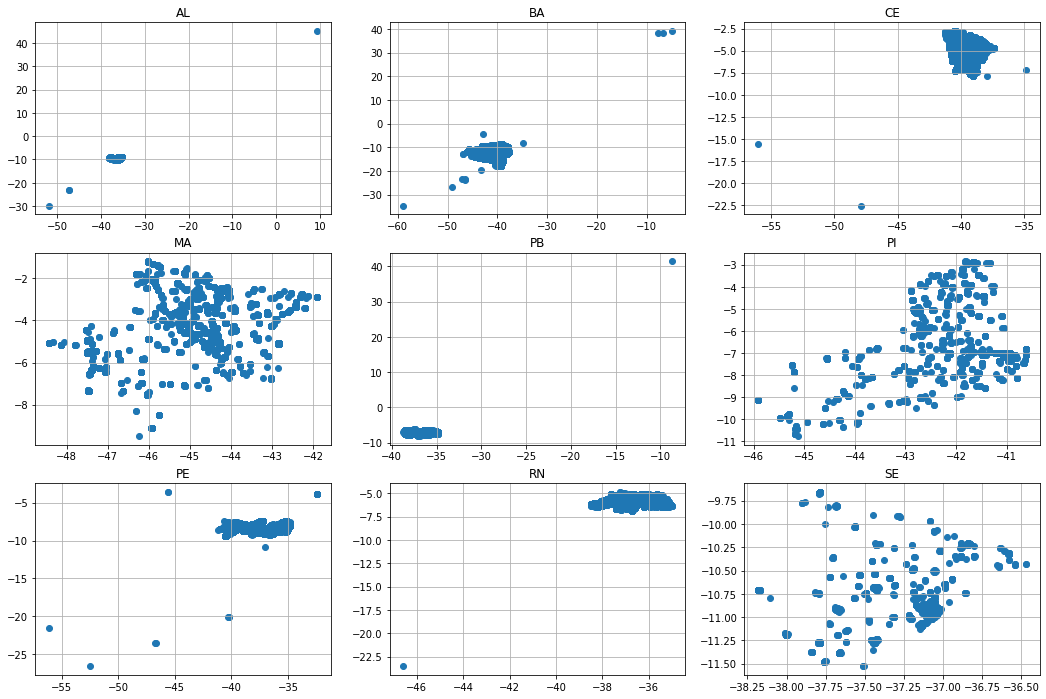

In [114]:
# Localização dos pedidos no nordeste
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(18, 12))
for i in range(len(nordeste)):
  axes[int(i/3)][i%3].scatter(geolocation[geolocation['geolocation_state'] == nordeste[i]]['geolocation_lng'], geolocation[geolocation['geolocation_state'] == nordeste[i]]['geolocation_lat'])
  axes[int(i/3)][i%3].set_title(nordeste[i])
  axes[int(i/3)][i%3].grid(True)

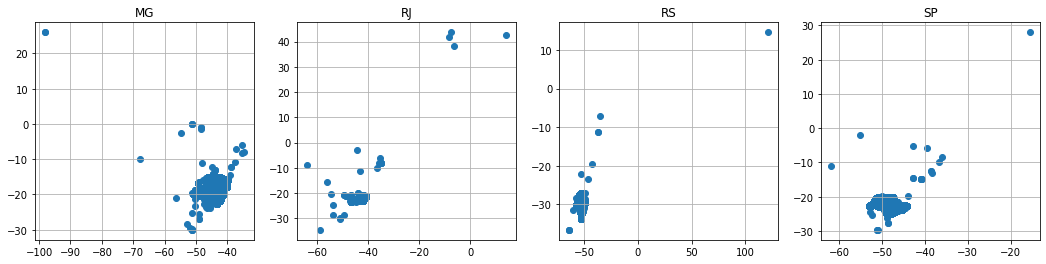

In [115]:
# Localização dos pedidos no sudeste
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(18, 4))
for i in range(len(sudeste)):
  axes[i].scatter(geolocation[geolocation['geolocation_state'] == sudeste[i]]['geolocation_lng'], geolocation[geolocation['geolocation_state'] == sudeste[i]]['geolocation_lat'])
  axes[i].set_title(sudeste[i])
  axes[i].grid(True)

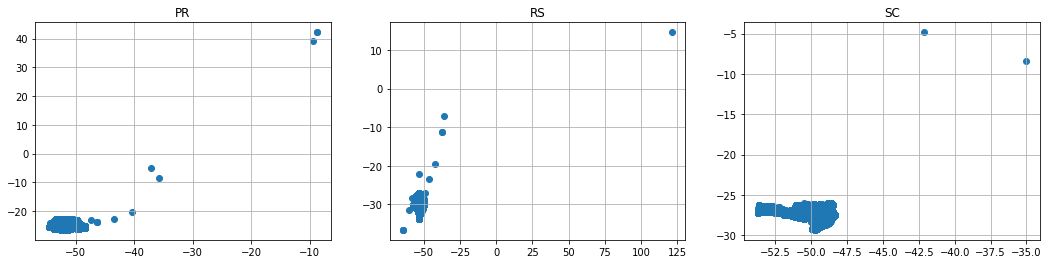

In [116]:
# Localização dos pedidos no sul
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(18, 4))
for i in range(len(sul)):
  axes[i].scatter(geolocation[geolocation['geolocation_state'] == sul[i]]['geolocation_lng'], geolocation[geolocation['geolocation_state'] == sul[i]]['geolocation_lat'])
  axes[i].set_title(sul[i])
  axes[i].grid(True)

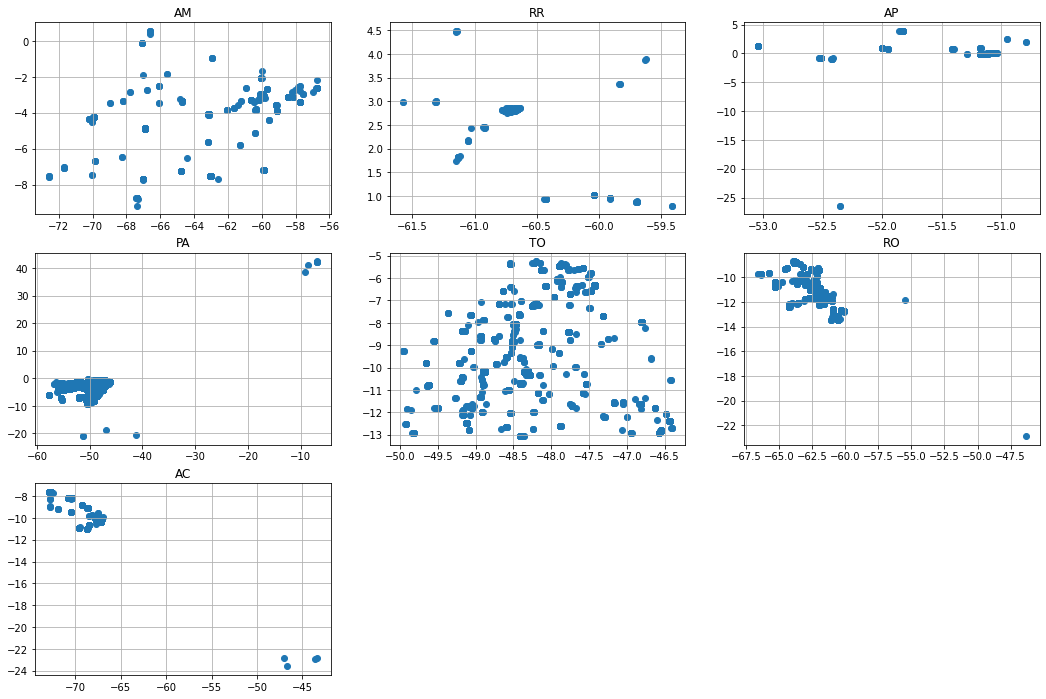

In [117]:
# Localização dos pedidos no norte
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(18, 12))
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])
for i in range(len(norte)):
  axes[int(i/3)][i%3].scatter(geolocation[geolocation['geolocation_state'] == norte[i]]['geolocation_lng'], geolocation[geolocation['geolocation_state'] == norte[i]]['geolocation_lat'])
  axes[int(i/3)][i%3].set_title(norte[i])
  axes[int(i/3)][i%3].grid(True)

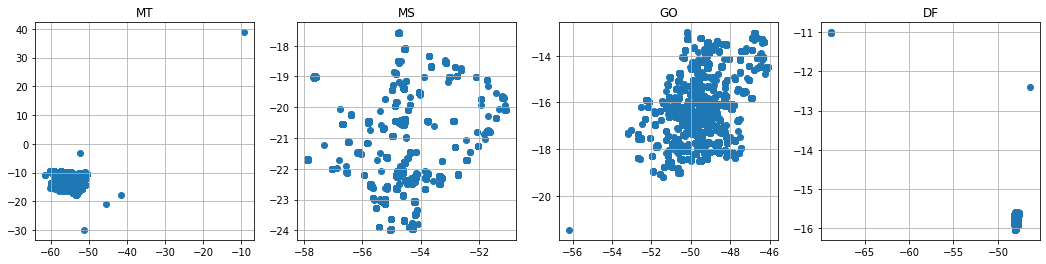

In [119]:
# Localização dos pedidos no centro_oeste
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(18, 4))
for i in range(len(centro_oeste)):
  axes[i].scatter(geolocation[geolocation['geolocation_state'] == centro_oeste[i]]['geolocation_lng'], geolocation[geolocation['geolocation_state'] == centro_oeste[i]]['geolocation_lat'])
  axes[i].set_title(centro_oeste[i])
  axes[i].grid(True)

# Estudo sobre os pedidos

In [ ]:
products.head()

Como existem muitas categorias, é interessante buscar aquelas cuja distribuição de alguma variável segue uma normal. Escolheremos a variável peso. E a seguir, plotaremos os respectivos boxplots e histogramas, evidenciando e o que foi suposto nos testes.

In [ ]:
# Categorias com mais de 100 registros

top_frequency_categories = products['product_category_name'].value_counts()[products['product_category_name'].value_counts() > 100].index.tolist()
tests = []

In [ ]:
for i in range(0, len(top_frequency_categories)):
  statistic, p_value = stats.shapiro(products[products['product_category_name'] == top_frequency_categories[i]]['product_weight_g'])
  x = float(statistic) 
  shapiro_test = {
      "statistic": statistic,
      "p_value": p_value,
      "category": top_frequency_categories[i]
  }
  if(not math.isnan(x)):
    tests.append(shapiro_test)

In [ ]:
tests = sorted(tests, key=lambda k: k['statistic'], reverse=True)

In [ ]:
tests[:5]

In [ ]:
# Histogramas dos 5 principais testes

In [ ]:
# Boxplot dos 5 principais testes

In [ ]:
products[products['product_category_name'] == 'moveis_escritorio']['product_weight_g'].plot(kind = 'hist')